## GaussianNB Classifier for Bank Customer retention

In [1]:
#--------------------------------------------------------------------------------------------------------------------------

## I have completed data analysis and data cleaning in the previous notebook (Analyzing Bank Customer Retention data.ipynb)
## Here I will do the implementation of NB Classifier for predictions and calculate the accuracy of model

#--------------------------------------------------------------------------------------------------------------------------

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("bank_churn_clean.csv")
df.head()

,CreditScore,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Male,France,Germany,Spain,Loyalty
0,619,0.00,1,1,1,101348.88,1,0,1,0,0,0.047619
1,608,83807.86,1,0,1,112542.58,0,0,0,0,1,0.024390
2,502,159660.80,3,1,0,113931.57,1,0,1,0,0,0.190476
3,699,0.00,2,0,0,93826.63,0,0,1,0,0,0.025641
4,850,125510.82,1,1,1,79084.10,0,0,0,0,1,0.046512


In [4]:
## Splitting the data into train test split

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [6]:
x = df.drop('Exited',axis=1)
y = df.Exited

print(x.head()), print(y.head())

   CreditScore    Balance  NumOfProducts  HasCrCard  IsActiveMember   
0          619       0.00              1          1               1  \
1          608   83807.86              1          0               1   
2          502  159660.80              3          1               0   
3          699       0.00              2          0               0   
4          850  125510.82              1          1               1   

   EstimatedSalary  Male  France  Germany  Spain   Loyalty  
0        101348.88     0       1        0      0  0.047619  
1        112542.58     0       0        0      1  0.024390  
2        113931.57     0       1        0      0  0.190476  
3         93826.63     0       1        0      0  0.025641  
4         79084.10     0       0        0      1  0.046512  
0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64


(None, None)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.25,stratify=y,random_state=42)

In [8]:
gnb = GaussianNB()

In [9]:
gnb.fit(X_train,y_train)

GaussianNB()

In [10]:
y_preds = gnb.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, recall_score, precision_score,f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [12]:
print("Accuracy: ",accuracy_score(y_test,y_preds)*100)
print("Recall: ",recall_score(y_test,y_preds))
print("Precision: ",precision_score(y_test,y_preds))
print("F1Score: ",f1_score(y_test,y_preds))

Accuracy:  79.64
Recall:  0.0
Precision:  0.0
F1Score:  0.0


C:\Users\diwak\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
np.unique(y_preds)

array([0], dtype=int64)

In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [15]:
gnb_scaled = GaussianNB()
gnb_scaled.fit(X_train,y_train)

scaled_pred = gnb_scaled.predict(X_test)

In [16]:
print("Accuracy: ",accuracy_score(y_test,scaled_pred)*100)
print("Precision: ",precision_score(y_test,scaled_pred))
print("Recall: ",recall_score(y_test,scaled_pred))
print("F1Score: ",f1_score(y_test,scaled_pred))


Accuracy:  79.4
Precision:  0.4921052631578947
Recall:  0.36738703339882123
F1Score:  0.420697412823397


In [17]:
np.unique(scaled_pred)

array([0, 1], dtype=int64)

In [18]:
def confusion_matrix_plot(model,x_data,y_data):
    
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data,model_pred,labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    
    disp.plot()
    plt.show()

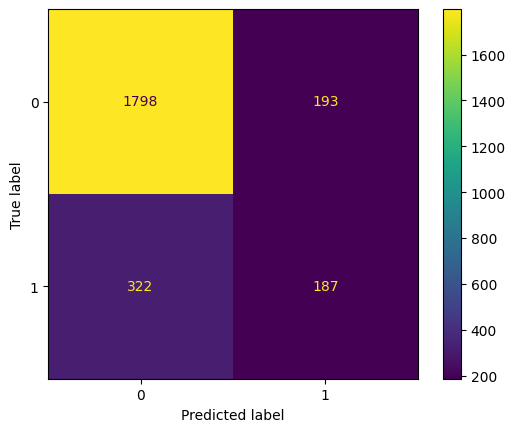

In [19]:
confusion_matrix_plot(gnb_scaled,X_test,y_test)